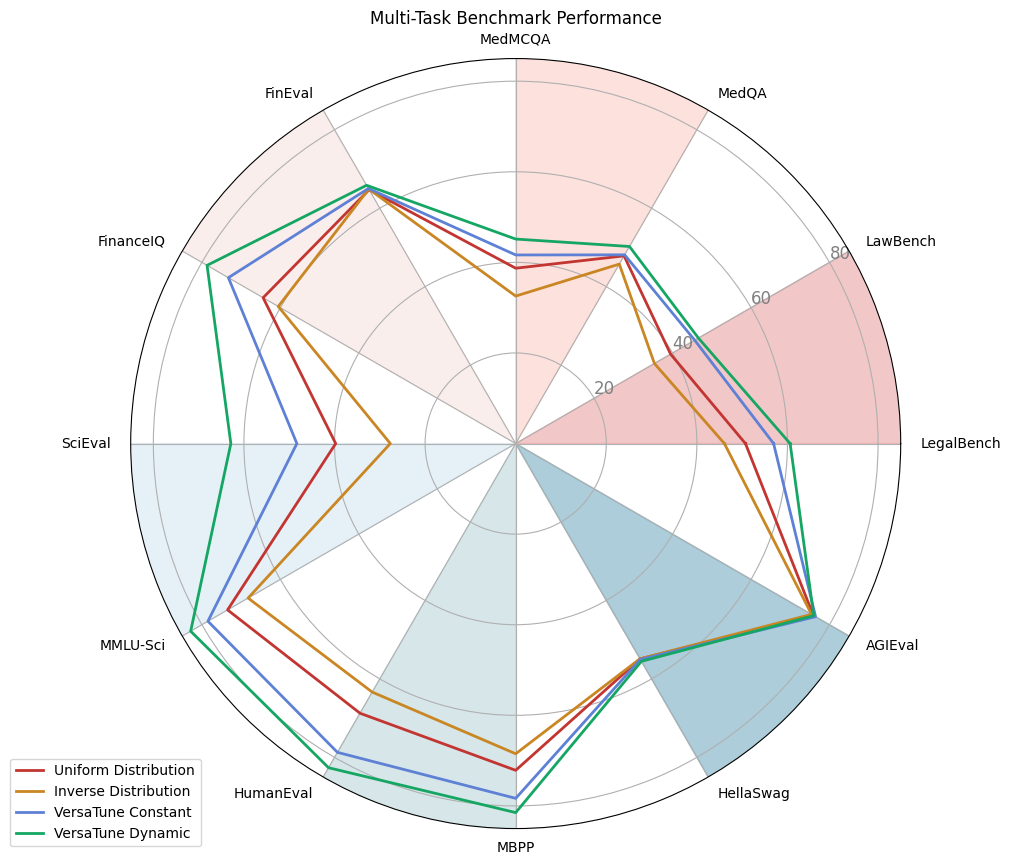

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from matplotlib.colors import LinearSegmentedColormap
import json

model_name = "baichuan2-7b" # "baichuan2-7b", "llama3-8b", "qwen1.5-7b", "qwen2-7b", "qwen2.5-7b", "baichuan2-13b", "qwen2.5-14b"

categories = ['LegalBench', 'LawBench', 'MedQA', 'MedMCQA', 'FinEval', 'FinanceIQ', 'SciEval', 'MMLU-Sci', 'HumanEval', 'MBPP', 'HellaSwag', 'AGIEval']
values1, values2, values3, values4 = [], [], [], []

with open("domain_score.json", "r") as f:
    domain_score = json.load(f)
    values1 = domain_score[model_name]["uniform_distribution"]
    values2 = domain_score[model_name]["inverse_distribution"]
    values3 = domain_score[model_name]["versatune_constant"]
    values4 = domain_score[model_name]["versatune_dynamic"]

domain_color = {
    'law': '#E59191',
    'medicine': '#FAC5BD',
    'finance': '#F4DFDA',
    'science': '#CCE4F0',
    'code': '#AECFD4',
    'others': '#5A9CB4'
}

# 计算每个类别的角度
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
values1 += values1[:1]  # 闭合图形
values2 += values2[:1]
values3 += values3[:1]
values4 += values4[:1]
angles += angles[:1]

# 初始化雷达图
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

ax.plot(angles, values1, linewidth=2, linestyle='solid', color='#C23531', label='Uniform Distribution')
# ax.fill(angles, values1, 'b', alpha=0.1)
ax.plot(angles, values2, linewidth=2, linestyle='solid', color='#CA8622', label='Inverse Distribution')
# ax.fill(angles, values2, 'r', alpha=0.1)
ax.plot(angles, values3, linewidth=2, linestyle='solid', color='#5E80D5', label='VersaTune Constant')
# ax.fill(angles, values3, 'g', alpha=0.1)
ax.plot(angles, values4, linewidth=2, linestyle='solid', color='#15A663', label='VersaTune Dynamic')
# ax.fill(angles, values4, 'y', alpha=0.1)

# 设置雷达图的每个轴的名称及起始位置
plt.xticks(angles[:-1], categories)

# 设置雷达图的范围
ax.set_rlabel_position(30)
plt.yticks([20, 40, 60, 80], ["20", "40", "60", "80"], color="grey", size=12)
plt.ylim(0, 85)

# 调整每个类别的字体位置
for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (pi / 2, 3 * pi / 2):
        label.set_horizontalalignment('center')
    elif 0 <= angle < pi / 2 or 3 * pi / 2 < angle <= 2 * pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')

# 设置背景颜色
def add_background(ax, start_angle, end_angle, color, alpha=0.5):
    rect = plt.Rectangle((start_angle, 0), end_angle - start_angle, 100, color=color, alpha=alpha, zorder=0)
    ax.add_patch(rect)

""" 设定背景颜色 """
# LegalBench 和 LawBench 的背景颜色
add_background(ax, angles[0], angles[1], domain_color["law"], alpha=0.5)
# MedQA 和 MedMCQA 的背景颜色
add_background(ax, angles[2], angles[3], domain_color["medicine"], alpha=0.5)
# FinEval 和 FinanceIQ 的背景颜色
add_background(ax, angles[4], angles[5], domain_color["finance"], alpha=0.5)
# SciEval 和 MMLU-Sci 的背景颜色
add_background(ax, angles[6], angles[7], domain_color["science"], alpha=0.5)
# HumanEval 和 MBPP 的背景颜色
add_background(ax, angles[8], angles[9], domain_color["code"], alpha=0.5)
# AGIEval 和 HellaSwag 的背景颜色
add_background(ax, angles[10], angles[11], domain_color["others"], alpha=0.5)

""" 设定过渡色 """
# LawBench 到 MedQA 的过渡色
# cmap_law2medicine = LinearSegmentedColormap.from_list("mycmap", [domain_color["law"], domain_color["medicine"]])
# for i in np.linspace(0, 1, 100):
#     angle = angles[1] + i * (angles[2] - angles[1])
#     color = cmap_law2medicine(i)
#     add_background(ax, angle, angle + (angles[2] - angles[1]) / 100, color, alpha=0.25)
# # Medicine 到 FinEval 的过渡色
# cmap_medicine2finance = LinearSegmentedColormap.from_list("mycmap", [domain_color["medicine"], domain_color["finance"]])
# for i in np.linspace(0, 1, 100):
#     angle = angles[3] + i * (angles[4] - angles[3])
#     color = cmap_medicine2finance(i)
#     add_background(ax, angle, angle + (angles[4] - angles[3]) / 100, color, alpha=0.25)
# # Finance 到 SciEval 的过渡色
# cmap_finance2science = LinearSegmentedColormap.from_list("mycmap", [domain_color["finance"], domain_color["science"]])
# for i in np.linspace(0, 1, 100):
#     angle = angles[5] + i * (angles[6] - angles[5])
#     color = cmap_finance2science(i)
#     add_background(ax, angle, angle + (angles[6] - angles[5]) / 100, color, alpha=0.25)
# # Science 到 HumanEval 的过渡色
# cmap_science2code = LinearSegmentedColormap.from_list("mycmap", [domain_color["science"], domain_color["code"]])
# for i in np.linspace(0, 1, 100):
#     angle = angles[7] + i * (angles[8] - angles[7])
#     color = cmap_science2code(i)
#     add_background(ax, angle, angle + (angles[8] - angles[7]) / 100, color, alpha=0.25)
# # Code 到 AGIEval 的过渡色
# cmap_code2others = LinearSegmentedColormap.from_list("mycmap", [domain_color["code"], domain_color["others"]])
# for i in np.linspace(0, 1, 100):
#     angle = angles[9] + i * (angles[10] - angles[9])
#     color = cmap_code2others(i)
#     add_background(ax, angle, angle + (angles[10] - angles[9]) / 100, color, alpha=0.25)
# # AGIEval 到 LegalBench 的过渡色
# cmap_others2law = LinearSegmentedColormap.from_list("mycmap", [domain_color["others"], domain_color["law"]])
# for i in np.linspace(0, 1, 100):
#     angle = angles[11] + i * (2 * pi - angles[11])
#     color = cmap_others2law(i)
#     add_background(ax, angle, angle + (2 * pi - angles[11]) / 100, color, alpha=0.25)


# 添加图例
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# 添加标题
plt.title('Multi-Task Benchmark Performance')

# 保存图表为 SVG 文件
plt.savefig(f'{model_name}_radar_chart_null.svg', format='svg')

# 显示图表
plt.show()